_Author_ : Mandla Senzanje 

_Email_ : Senzanjeeddy@gmail.com

_Date_ : 10/7/2019

For forecasting I decided to use Facebook's open source forecasting tool.
link/source: https://research.fb.com/prophet-forecasting-at-scale/

I will be forecasting revenue into the new year


In [67]:
#Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [68]:
#Importing Libraries

import statsmodels.api as sm
from scipy import stats

from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [69]:
#Importing prophet
#"pip install fbprophet" to run code
from fbprophet import Prophet

In [70]:
#Loading Data
data= pd.read_csv('C:/Users/15073/Documents/Data/Blue Sprig/Raw Data.csv')

In [71]:
#Data Preview
data.head()

,Date of Service,Total Billing Charge
0,8/19/2019,92.0
1,8/19/2019,64.0
2,8/20/2019,61.0
3,8/20/2019,94.0
4,8/12/2019,66.0


In [72]:
#Checking for columns and rows before grouping data
data.shape

(150002, 2)

In [73]:
#Turning "Data of Service" into a formart pandas will know it is a Date
data.loc[:, 'Date of Service'] = pd.to_datetime(data.loc[:,'Date of Service'], format="%m/%d/%Y")

In [74]:
import datetime
data.index = data['Date of Service'] 

In [75]:
#Grouping data. View sum of 'Total Billing Charge' by daily date
data.resample('D').sum()

,Total Billing Charge
Date of Service,
2018-12-31,1572.00
2019-01-01,0.00
2019-01-02,80422.78
2019-01-03,85816.28
2019-01-04,92255.25
2019-01-05,85.00
2019-01-06,0.00
2019-01-07,99040.19
2019-01-08,98900.69


In [76]:
#Making original data frame aggregate by daily total
data = data.resample('D').sum()

In [77]:
#Exporting new data frame into a csv, for fute use
data.to_csv(r'C:/Users/15073/Desktop/ByDay1.csv')

In [78]:
#Loading new aggregated data
final_df = pd.read_csv('C:/Users/15073/Desktop/ByDay1.csv')

In [79]:
#Preview of new data
final_df.head()

,Date of Service,Total Billing Charge
0,2018-12-31,1572.00
1,2019-01-01,0.00
2,2019-01-02,80422.78
3,2019-01-03,85816.28
4,2019-01-04,92255.25


In [80]:
# Data shape has reduced after aggregating
final_df.shape

(237, 2)

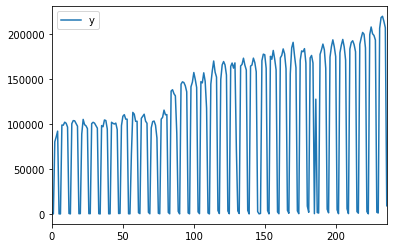

In [103]:
#Visualizing time series of our historical data

final_df.plot()

In [82]:
# Line 82 - 84 Preparing for our dataframe for fbprophet
m = Prophet()

In [83]:
ph_df = final_df

In [84]:
#Note: its neccesary to remane our variables to ds for date variable, and y for our Continous variable
ph_df.rename(columns={'Total Billing Charge': 'y', 'Date of Service': 'ds'}, inplace=True)

In [85]:
ph_df.head()

,ds,y
0,2018-12-31,1572.00
1,2019-01-01,0.00
2,2019-01-02,80422.78
3,2019-01-03,85816.28
4,2019-01-04,92255.25


In [86]:
#fit out data
m.fit(final_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [87]:
# Create Future dates
future_revenue = m.make_future_dataframe(periods=183)
# Predict Revenue
forecast = m.predict(future_revenue)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
415,2020-02-19,268016.752412,233293.183562,303748.460792
416,2020-02-20,258901.636684,227839.383754,291650.633295
417,2020-02-21,250554.042999,218611.990722,282951.999562
418,2020-02-22,118600.311061,87014.054275,151463.085491
419,2020-02-23,117755.930947,86037.505904,149548.992121


C:\Users\15073\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



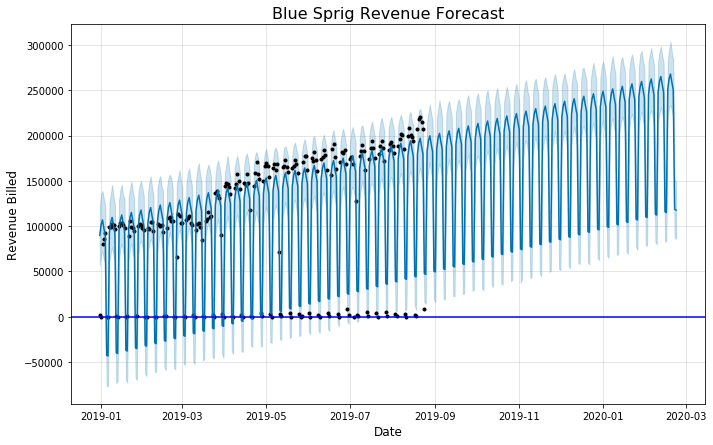

In [93]:
import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2018, 12, 31)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2018, 12, 31)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2018, 12, 31)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Blue Sprig Revenue Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Revenue Billed", fontsize=12)



ax1.axhline(y=100, color='b', linestyle='-')

plt.show()

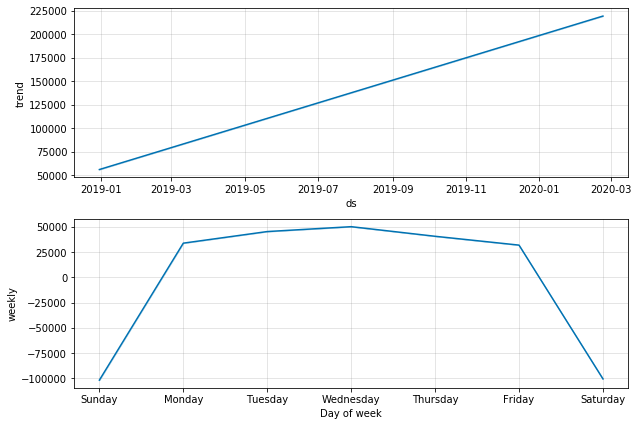

In [89]:
fig2 = m.plot_components(forecast)
plt.show()

# Conclusion and Notes
Note: Forecast has the default confidence interval of prophet with is 0.80
Overrall we are seeing an upwards trajectory in revenue going into the the following year. I would definately run more traditional methods of forecasting (ARMIA) and compare the two.


### Limitations and way to improve
1) This model builds a forecast with the assumtion that Blue Sprig stays with the same about of Locations. From the knowledge I have, Blue Sprig seems to be growth fast and more location are inevitable.The two coming soon locations (Chandler Clinic, Westlake Clinic) will definately affect the forecast. My assumption would be revenue would be higher that predicted.

2) The model does a good job for the most part, but needs to do a better of fitting during some time periods (2019-07 to 2019 - 08). Having more domain knowledge would help when it comes to tweaking  for a better forecast.

3) The more historical data we have the better forecasting we can make
    a) The forecast does not account for how american holidays affect it
    b) The forecast does not account for seasonaly changes
    
4) Validate the forecast, most like using Root Mean Square Error


   
 